<img
src="http://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png"
WIDTH=180 HEIGHT=180>

<CENTER>

<p><font size="5"> Cursus Recherche : Module Analogie </font></p>
<p><font size="5"> Representation Learning </font></p>
</br>
<p><font size="4"> [<span style="color:blue">Institut Mines Télécom</span>](https://www.mines-telecom.fr/en/)</p>

</CENTER>

----------------------------

# <span style="color:##00B8DE"> Pipeline : from reduction to clustering</span>

**1)** With OliFaces


**2)** With Digits


**3)** With Haxby

**1)** With OliFaces

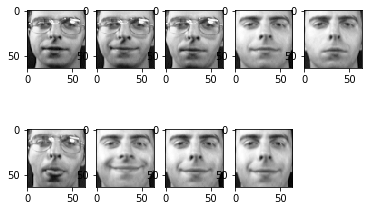

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Clustering performance evaluation for ICA/kmeans on OliFaces: 
0.170786079173

And for homogeneity score 
0.441136382758


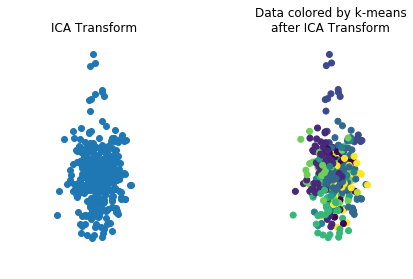

Clustering performance evaluation for PCA/Kmeans on OliFaces : 
0.163146770896

And for homogeneity score 
0.434055271348


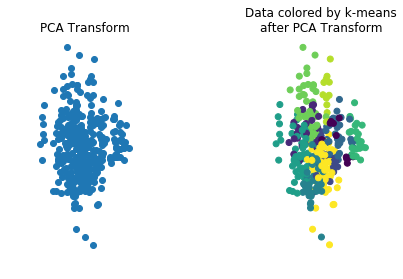

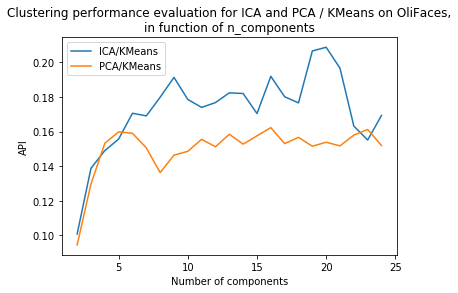

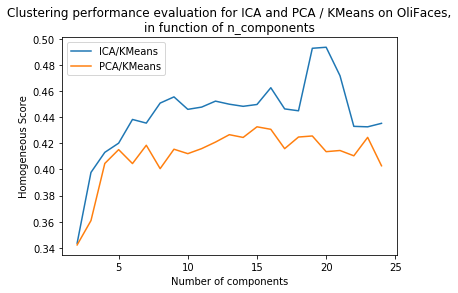

In [8]:
# We will Test ICA Transform on OliFaces

%matplotlib inline

import sklearn.datasets as skld
from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics

#ICA
from sklearn.decomposition import FastICA,PCA


#We generate our samples
OliFaces = skld.fetch_olivetti_faces()
Target = np.array(OliFaces.target)

#Printing samples of the dataset of OliFaces
r = random.randint(0,39)
plt.figure()
plt.title("Samples Olivetti Faces")
for k in range(9):
    plt.subplot(25*10+(k+1))
    plt.imshow(OliFaces.images[10*r+k],cmap=plt.cm.gray)
plt.savefig('olivettiFaces_samples.png', bbox_inches = 'tight')
plt.show()

#ICA
def oliFaces_ICA_kmeans(n):
    ica = FastICA(n_components=n, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
    ImageOliICA = ica.fit_transform(OliFaces.images.reshape(400,64*64))#This transformation is a compression of data
    
    #Clusterization ICA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',\
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageOliICA)
    labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    return labelsICA, ImageOliICA

#PCA
def oliFaces_PCA_kmeans(n):
    pca = PCA(n_components=n, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    ImageOliPCA = pca.fit_transform(OliFaces.images.reshape(400,64*64))#This transformation is a compression of data
    #ClusterisationPCA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageOliPCA)
    labelsPCA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    return labelsPCA, ImageOliPCA

##Plot ICA

n = 15

labelsICA, ImageOliFacesICA = oliFaces_ICA_kmeans(n)

print("Clustering performance evaluation for ICA/kmeans on OliFaces: ")
print(metrics.adjusted_rand_score(Target, labelsICA)) 
print("\nAnd for homogeneity score ")
print(metrics.homogeneity_score(Target, labelsICA))

plt.figure()
plt.subplot(131)
plt.title("ICA Transform")
plt.scatter(ImageOliFacesICA[:,0],ImageOliFacesICA[:,1])
plt.axis('off')
plt.subplot(133)
plt.title("Data colored by k-means\nafter ICA Transform")
plt.scatter(ImageOliFacesICA[:,0],ImageOliFacesICA[:,1],c=labelsICA)
plt.axis('off')
plt.savefig('ICA_KMEANS_Clust_OliFaces.png', bbox_inches = 'tight')
plt.show()

N = 25
PerfICA = []
PerfHomoICA = []
perfICA = 0
indX = [i for i in range(2,N)]
for m in range(2,N):
    labelsICA, ImageDigitsICA = oliFaces_ICA_kmeans(m)
    perfICA = metrics.adjusted_rand_score(Target, labelsICA)
    perfHomoICA = metrics.homogeneity_score(Target, labelsICA)
    PerfICA.append(perfICA)
    PerfHomoICA.append(perfHomoICA)

##Plot PCA

labelsPCA, ImageOliFacesPCA = oliFaces_PCA_kmeans(n)

print("Clustering performance evaluation for PCA/Kmeans on OliFaces : ")
print(metrics.adjusted_rand_score(Target, labelsPCA))
print("\nAnd for homogeneity score ")
print(metrics.homogeneity_score(Target, labelsPCA))

plt.figure()
plt.subplot(131)
plt.title("PCA Transform")
plt.scatter(ImageOliFacesPCA[:,0],ImageOliFacesPCA[:,1])
plt.axis('off')
plt.subplot(133)
plt.title("Data colored by k-means\nafter PCA Transform")
plt.scatter(ImageOliFacesPCA[:,0],ImageOliFacesPCA[:,1],c=labelsPCA)
plt.axis('off')
plt.savefig('PCA_KMEANS_Clust_OliFaces.png', bbox_inches = 'tight')
plt.show()


PerfoAPI = []
PerfoHomoScore = []
indx = [i for i in range(2,N)]
for m in range(2,N):
    labelsPCA, ImageOliFacesPCA = oliFaces_PCA_kmeans(m)
    perfAPI = metrics.adjusted_rand_score(Target,labelsPCA)
    perfHomoScore = metrics.homogeneity_score(Target, labelsPCA)
    PerfoAPI.append(perfAPI)
    PerfoHomoScore.append(perfHomoScore)
    
plt.figure()
plt.plot(indX, PerfICA, label="ICA/KMeans")
plt.plot(indx, Perfo, label="PCA/KMeans")
plt.title("Clustering performance evaluation for ICA and PCA / KMeans on OliFaces,\nin function of n_components")
plt.xlabel('Number of components')
plt.ylabel('API')
plt.legend()
plt.savefig('PCA_ICA_KMEANS_OliFaces_perf.png')
plt.show()

plt.figure()
plt.plot(indX, PerfHomoICA, label="ICA/KMeans")
plt.plot(indx, PerfoHomoScore, label="PCA/KMeans")
plt.title("Clustering performance evaluation for ICA and PCA / KMeans on OliFaces,\nin function of n_components")
plt.xlabel('Number of components')
plt.ylabel('Homogeneous Score')
plt.legend()
plt.savefig('PCA_ICA_KMEANS_OliFaces_perf_homogeneityScore.png')
plt.show()

Les courbes d'évaluation de performance de clustering pour PCA et ICA sont globalement croissantes en fonction du nombre de n_component, mais divergent assez rapidement (i.e. Elles perdent en régularité).
On s'aperçit aussi qu'en augmentant le nombre de clusters que le kmeans cherche, on a tendance à "lisser" les courbes de PCA/kmeans et d'ICA/kmeans.

**2)** With Digits

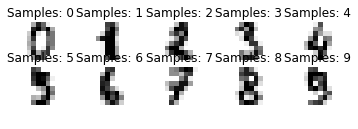

Clustering performance evaluation for PCA/Kmeans on Digits : 
66.43 %


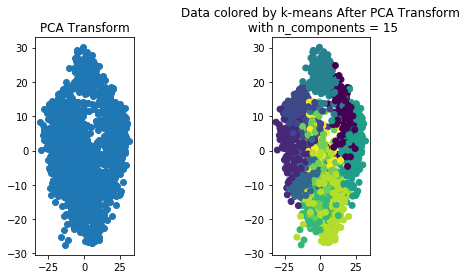

C:\Users\Nicolas\Miniconda3\envs\EnvironnementAnalogie\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Clustering performance evaluation for ICA/kmeans on Digits: 
66.82 %


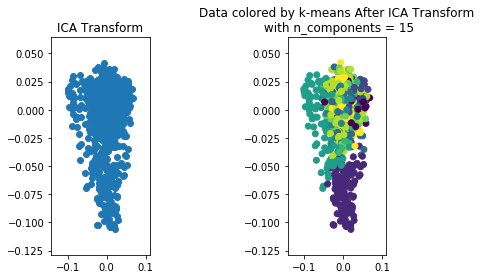

Text(0.5,1,'Clustering performance evaluation for PCA/kmeans on Digits, in function of n_components')

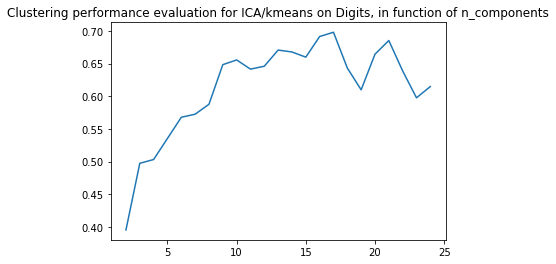

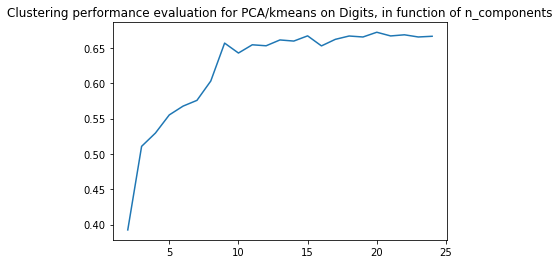

In [48]:
# We will Test PCA Transform on Digits

%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
plt.figure()
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(5, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Samples: %i' % label)
plt.show()

#PCA
def Digits_PCA_kmeans(n,interrupteur):
    pca = PCA(n_components=n, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    ImageDigitsPCA = pca.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data

    #ClusterisationPCA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsPCA)
    labelsPCA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    global perf
    
    if interrupteur :
        perf = metrics.adjusted_rand_score(digits.target,labelsPCA)
    
    else :
        print("Clustering performance evaluation for PCA/Kmeans on Digits : ")
        print((10000*metrics.adjusted_rand_score(digits.target, labelsPCA)//1)/100,'%')

        plt.subplot(131)
        plt.title("PCA Transform")
        plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1])
        plt.subplot(133)
        plt.title("Data colored by k-means After PCA Transform\n with n_components = %i" % n)
        plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1],c=labelsPCA)

        plt.show()


#ICA
def Digits_ICA_kmeans(n, interrupteur):
    ica = FastICA(n_components=n, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
    ImageDigitsICA = ica.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data
    
    #Clusterization ICA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsICA)
    labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    global perf
        
    if interrupteur :
        perf = metrics.adjusted_rand_score(digits.target,labelsICA)
        
    else :
        print("Clustering performance evaluation for ICA/kmeans on Digits: ")
        print((10000*metrics.adjusted_rand_score(digits.target, labelsICA)//1)/100,'%')
    
    
        plt.subplot(131)
        plt.title("ICA Transform")
        plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1])
        plt.subplot(133)
        plt.title("Data colored by k-means After ICA Transform\n with n_components = %i" % n)
        plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1],c=labelsICA)
    
        plt.show()


n = random.randint(2,19)
Digits_PCA_kmeans(n,False)
Digits_ICA_kmeans(n,False)

N = 25
Perf = []
indX = [i for i in range(2,N)]
for n in range(2,N):
    Digits_ICA_kmeans(n,True)
    Perf.append(perf)

plt.figure()
plt.plot(indX, Perf)
plt.title("Clustering performance evaluation for ICA/kmeans on Digits, in function of n_components")

M = 25
Perfo = []
indx = [i for i in range(2,M)]
for n in range(2,M):
    Digits_PCA_kmeans(n,True)
    Perfo.append(perf)

plt.figure()
plt.plot(indx, Perfo)
plt.title("Clustering performance evaluation for PCA/kmeans on Digits, in function of n_components")


La performance du clustering sur les Digits avec Pca/kmeans est croissante et plafonne à environ 66%, dès n_component = 14.
La performance du clustering sur les Digits avec Ica/kmeans est globalement croissante jusqu'à n_component = 20, où elle plafonne à 70%, et puis la méthode diverge !

**3)** With Haxby

In [1]:
# import Data Set !
from nilearn import datasets
import numpy as np
# By default 2nd subject from haxby datasets will be fetched.
haxby_dataset = datasets.fetch_haxby()

# Print basic information on the dataset
print('Mask nifti images are located at: %s' % haxby_dataset.mask)
print('Functional nifti images are located at: %s' % haxby_dataset.func[0])

func_filename = haxby_dataset.func[0]
mask_filename = haxby_dataset.mask

# Load the behavioral data that we will predict
labels = np.recfromcsv(haxby_dataset.session_target[0], delimiter=" ")
y = labels['labels']
session = labels['chunks']

# Remove the rest condition, it is not very interesting
non_rest = y != b'rest'
y = y[non_rest]

# Get the labels of the numerical conditions represented by the vector y
unique_conditions, order = np.unique(y, return_index=True)
# Sort the conditions by the order of appearance
unique_conditions = unique_conditions[np.argsort(order)]

#Pour pca ica, faire des tests de nbres de components de 1 à 10(boucle for), qui donne % de réussite (plus c'est proche de 1, mieux c'est) et 3 images. 


Dataset created in C:\Users\loic/nilearn_data\haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (15 seconds, 0 min)


Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (520 seconds, 8 min)
Extracting data from C:\Users\loic/nilearn_data\haxby2001\c2acb32a0dc9f8cb769ce50ba7dbd1b4\subj2-2010.01.14.tar.gz..... done.


Mask nifti images are located at: C:\Users\loic/nilearn_data\haxby2001\mask.nii.gz
Functional nifti images are located at: C:\Users\loic/nilearn_data\haxby2001\subj2\bold.nii.gz


In [2]:
from nilearn.input_data import NiftiMasker
# For decoding, standardizing is often very important
nifti_masker = NiftiMasker(mask_img=mask_filename, standardize=True,
                           sessions=session, smoothing_fwhm=4,
                           memory="nilearn_cache", memory_level=1)
X = nifti_masker.fit_transform(func_filename)

# Remove the "rest" condition
X = X[non_rest]
session = session[non_rest]

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\nilearn\input_data\nifti_masker.py:293: UserWarning: Persisting input arguments took 1.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  copy=copy
